In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                             )

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
PROTEIN_SIZE = 1200
DELTA_T = 0.39

In [37]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Long-Movie/SnailCoreTATA/"
files = [
        "Snail CT 061222 E1_1_track.csv",
        "Snail CT 061222 E1_2_track.csv",
        "Snail CT 061222 E1_3_track.csv",
        "Snail CT 061222 E2_1_track.csv",
        'Snail CT 071222 E2_1_track.csv',
        'Snail CT 071222 E2_2_track.csv',
        "Snail CT 071222 E3_1_track.csv",
        "Snail CT 071222 E3_3_track.csv",
        ]


# Single track analysis

In [5]:
datas = read_csv_file(path+files[0])

In [6]:
print(np.unique(datas.TRACK_ID))
datas.head()

[18 20 78]


LABEL      ID  TRACK_ID        QUALITY  POSITION_X  POSITION_Y  \
3  ID110593  110593        18   215535.59375    4.253801    5.319090   
4  ID119808  119808        18  214750.171875    4.280367    6.304647   
5  ID117765  117765        18  197324.515625    4.313149    6.042298   
6  ID105478  105478        18     201752.125    3.674862    4.880072   
7  ID116744  116744        18  206702.265625    4.208138    6.106479   

           POSITION_Z  POSITION_T  FRAME               RADIUS VISIBILITY  \
3   2.920203231462362   82.158333    211  0.27675532062103897          1   
4  2.3640574082897006  184.174841    473  0.27675532062103897          1   
5  2.5678084253116538  163.927289    421  0.27675532062103897          1   
6  3.2667800599565266   13.238783     34  0.27675532062103897          1   
7  2.4197070119964597  152.635386    392  0.27675532062103897          1   

   MEAN_INTENSITY_CH1 MEDIAN_INTENSITY_CH1 MIN_INTENSITY_CH1  \
3        11957.392405              11551.0           10001.0   
4        12157.367089              11549.0           10409.0   
5        11321.848101              11117.0           10214.0   
6        11647.151899              11397.0           10144.0   
7        11597.202532              11248.0           10315.0   

  MAX_INTENSITY_CH1 TOTAL_INTENSITY_CH1   STD_INTENSITY_CH1  \
3           16474.0            944634.0  1430.9148357330932   
4           16046.0            960432.0  1482.9764869863027   
5           14196.0            894426.0   840.3082018324355   
6           14507.0            920125.0  1018.3972965174449   
7           14938.0            916179.0  1107.2840459679019   

           CONTRAST_CH1             SNR_CH1  
3   0.05848451525444362  0.9234408374150147  
4   0.06485159757206732  0.9985431874302588  
5  0.038091791979753264  0.9887906791585027  
6   0.04536497177782087  0.9926249765868388  
7  0.042969000542901675  0.8629945370798546

In [7]:
id_track = 18
x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)
print(elongation_r, translation_init_r)

33.42698974689065 98.2566776155994


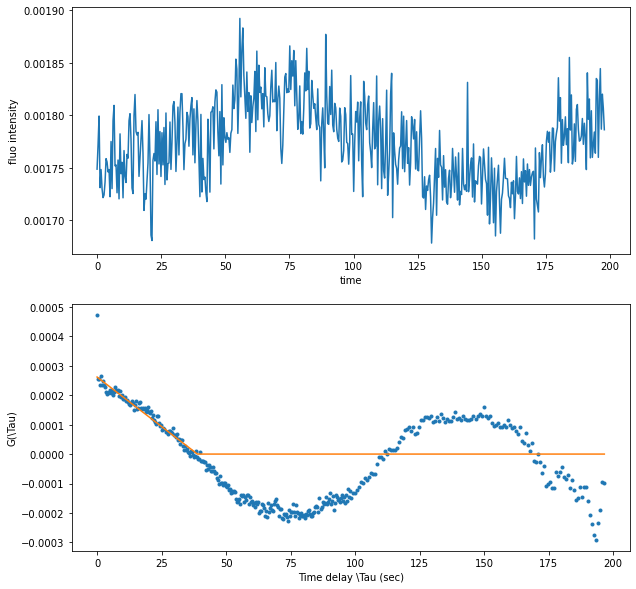

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x_auto, y_auto, '.')
ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

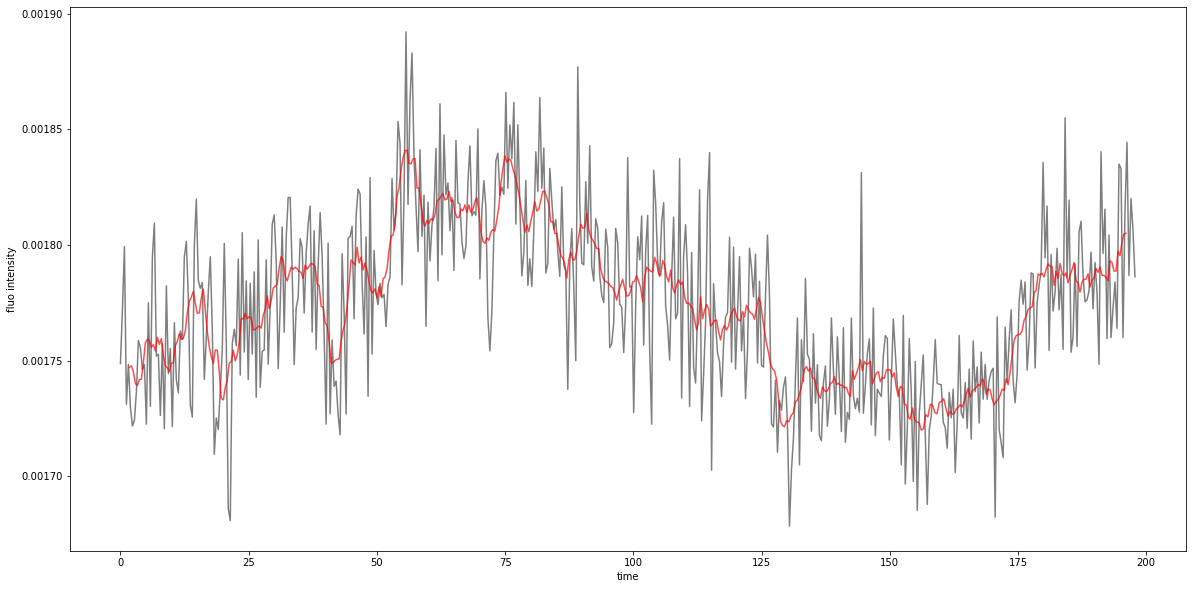

In [9]:
# Moyenne par fenetre glissante
from collections import deque
def fenetre_glissante(sequence, k):
    """Calcule une moyenne sur des fenêtres glissantes.
    k est la taille de la fenêtre glissante
 
    >>> fenetre_glissante([40, 30, 50, 46, 39, 44], 3)
    [40.0, 42.0, 45.0, 43.0]
    """
    d = deque(sequence[:k])  # on initialise avec les k premiers élements
    avg, s = [], sum(d)
    avg.append(s / k)  # la moyenne sur la fenêtre
 
    for elt in sequence[k:]:
        s += elt - d.popleft()  # on enlève la 1re valeur, on ajoute la nouvelle
        d.append(elt)
        avg.append(s / k)
 
    return avg
y_gliss = fenetre_glissante(y, 10)
x_gliss = fenetre_glissante(x, 10)

fig, ax = plt.subplots(1,1)
ax.plot(x,y, color='black', alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("fluo intensity")
ax.plot(x_gliss, y_gliss, color='red', alpha=0.7)
fig.set_size_inches((20,10))


32.843546156771716


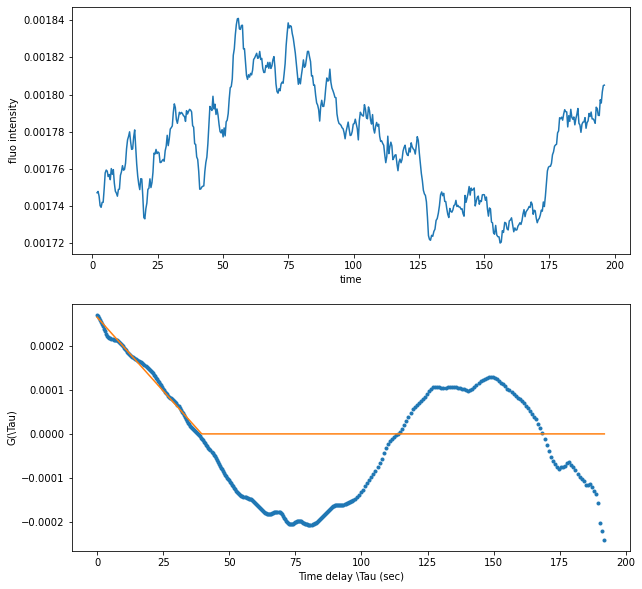

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x_gliss,y_gliss)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

x_autocor, y_autocor = autocorrelation(y_gliss, DELTA_T)

elongation_r, translation_init_r = fit_autocorrelation(x_autocor, 
                                                       y_autocor, 
                                                       fit_function, 
                                                       protein_size=PROTEIN_SIZE)


print(elongation_r)
ax[1].plot(x_autocor, y_autocor, '.')
ax[1].plot(x_autocor, fit_function(x_autocor, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

In [12]:
y_sub = y[::2]
x_sub = x[::2]

# fig, ax = plt.subplots(1,1)
# ax.plot(x,y, color='black', alpha=0.5)
# ax.set_xlabel("time")
# ax.set_ylabel("fluo intensity")
# ax.plot(x_gliss, y_gliss, color='red', alpha=0.7)
# ax.plot(x_sub, y_sub, color='blue', alpha=0.7)
# fig.set_size_inches((20,10))

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines',
                    name='original',
                    line = dict(color='black'), opacity=0.6))
fig.add_trace(go.Scatter(x=x_gliss, y=y_gliss,
                    mode='lines',
                    name='sliding window',
                  line = dict(color='red'), opacity=0.7))
fig.add_trace(go.Scatter(x=x_sub, y=y_sub,
                    mode='lines',
                    name='sub-sampled',
                  line = dict(color='green'), opacity=1))

fig.show()


73.78780314471155


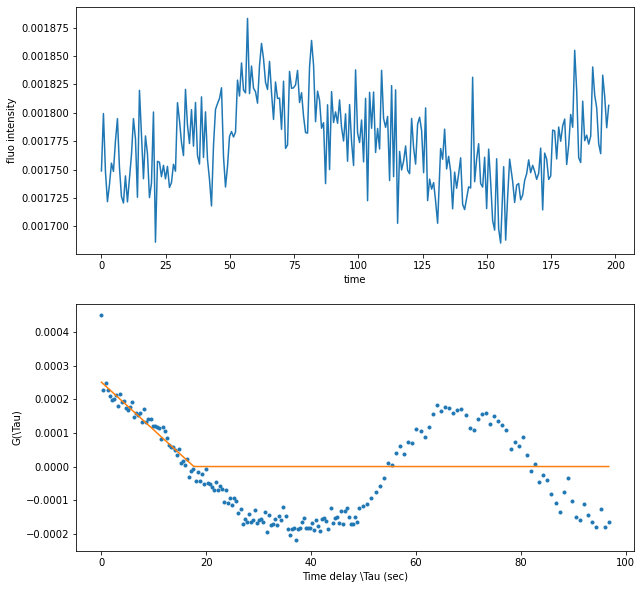

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x_sub,y_sub)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

x_autocor, y_autocor = autocorrelation(y_sub, DELTA_T)

elongation_r, translation_init_r = fit_autocorrelation(x_autocor, 
                                                       y_autocor, 
                                                       fit_function, 
                                                       protein_size=PROTEIN_SIZE)


print(elongation_r)
ax[1].plot(x_autocor, y_autocor, '.')
ax[1].plot(x_autocor, fit_function(x_autocor, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

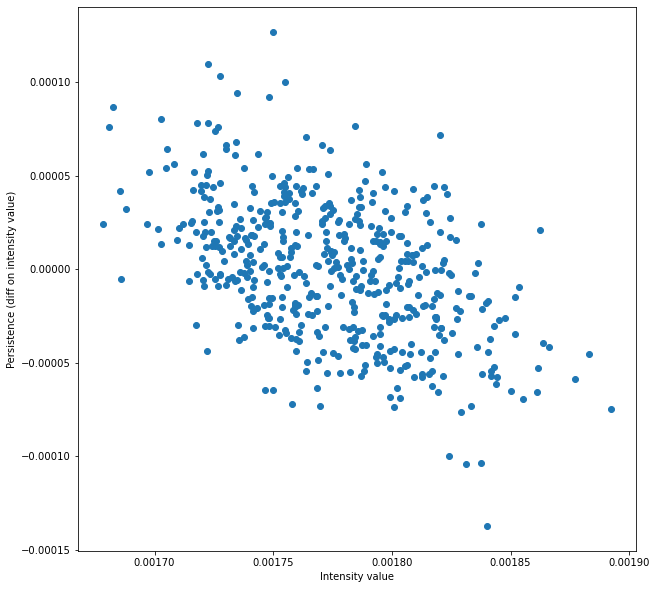

In [14]:
fig, ax = plt.subplots()
ax.scatter(y[:-1], np.diff(y))
ax.set_xlabel("Intensity value")
ax.set_ylabel("Persistence (diff on intensity value)")
fig.set_size_inches((10,10))

# plot all track that was keep in result table

In [20]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]

f=path+files[0]
datas = read_csv_file(f)



for id_track in np.unique(datas['TRACK_ID']):

    x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)
    if elongation_r>5:
        d = pd.DataFrame.from_dict({'file_name':f.split('/')[-2],
                                    'track_id':id_track,
                                    'len_track': len(x),
                                    'elongation_time':elongation_r,
                                    'init_translation_rate':translation_init_r},
                                   orient='index').T
        result = pd.concat([result, d], ignore_index=True)


result['tmp'] = 1

In [21]:
result

file_name track_id len_track elongation_time init_translation_rate  tmp
0  SnailCoreTATA       18       506        33.42699             98.256678    1
1  SnailCoreTATA       20       426       29.701161             65.710959    1
2  SnailCoreTATA       78       426       36.831572            207.141304    1

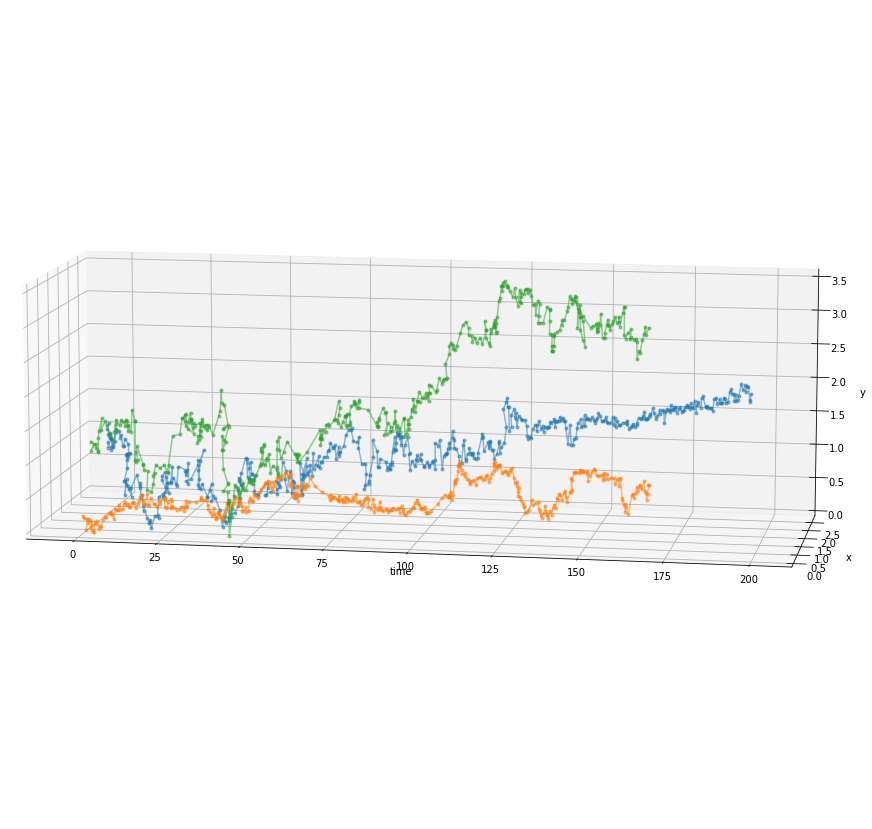

In [22]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id'].to_numpy()):
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )

ax.set_xlabel('time')
ax.set_ylabel('x')
ax.set_zlabel('y')
fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

3


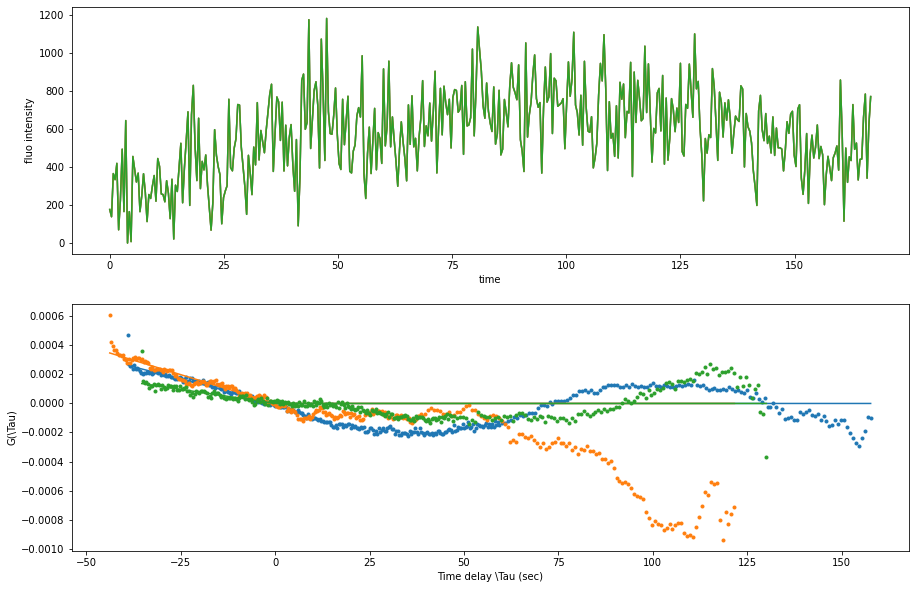

In [35]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_track in np.unique(result['track_id']):#[:5]:

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)
    
    ax[0].plot(x, y, color=colors[i])


    x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)


    ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
               y_auto, 
               '.', 
               color=colors[i])
    ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
               fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r ), 
               color=colors[i] )
    
    
    
    if i == 7:
        i=0
    else:
        i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")



fig.set_size_inches((15,10))
print(len(np.unique(result['track_id'])))

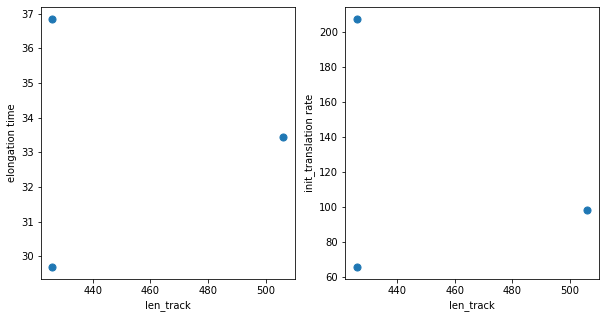

In [36]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

# Multiple file analysis

In [44]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
for f in files:
    f = path+f
    datas = read_csv_file(f)


    for id_track in np.unique(datas['TRACK_ID']):
        x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)
        
        
        if PROTEIN_SIZE/elongation_r>5:
            d = pd.DataFrame.from_dict({'file_name':f.split('/')[-1],
                                        'track_id':id_,
                                        'len_track': len(x)*DELTA_T,
                                        'elongation_time':elongation_r,
                                        'init_translation_rate':translation_init_r},
                                       orient='index').T
            result = pd.concat([result, d], ignore_index=True)



result['tmp'] = 1
# result.drop(result[result["len_track"]<100].index, inplace=True)

In [45]:
# result.sort_values('len_track')
result

file_name track_id len_track elongation_time  \
0   Snail CT 061222 E1_1_track.csv       59    197.34        33.42699   
1   Snail CT 061222 E1_1_track.csv       59    166.14       29.701161   
2   Snail CT 061222 E1_1_track.csv       59    166.14       36.831572   
3   Snail CT 061222 E1_2_track.csv       59    191.88       58.710773   
4   Snail CT 061222 E1_2_track.csv       59    197.73       22.893019   
5   Snail CT 061222 E1_2_track.csv       59    154.44       28.489457   
6   Snail CT 061222 E1_2_track.csv       59     156.0       29.626129   
7   Snail CT 061222 E1_2_track.csv       59    169.65       55.250952   
8   Snail CT 061222 E1_3_track.csv       59    190.71       56.901926   
9   Snail CT 061222 E1_3_track.csv       59    198.51       19.493409   
10  Snail CT 061222 E1_3_track.csv       59    176.28       96.282938   
11  Snail CT 061222 E1_3_track.csv       59    176.67       23.917312   
12  Snail CT 061222 E1_3_track.csv       59    175.11       24.967005   
13  Snail CT 061222 E1_3_track.csv       59    192.66       18.462001   
14  Snail CT 061222 E1_3_track.csv       59    184.86       33.575222   
15  Snail CT 061222 E1_3_track.csv       59    181.35        31.83285   
16  Snail CT 061222 E1_3_track.csv       59     175.5       26.978755   
17  Snail CT 061222 E2_1_track.csv       59    196.56       42.791461   
18  Snail CT 061222 E2_1_track.csv       59    196.95       33.784166   
19  Snail CT 071222 E2_1_track.csv       59     59.67      256.410194   
20  Snail CT 071222 E2_1_track.csv       59     54.99       71.172404   
21  Snail CT 071222 E3_1_track.csv       59    122.07       26.041977   
22  Snail CT 071222 E3_1_track.csv       59    196.56      108.052925   
23  Snail CT 071222 E3_1_track.csv       59    106.86      259.812673   
24  Snail CT 071222 E3_1_track.csv       59     140.4       79.216959   
25  Snail CT 071222 E3_1_track.csv       59     120.9      102.563273   
26  Snail CT 071222 E3_1_track.csv       59    102.96       74.073981   
27  Snail CT 071222 E3_3_track.csv       59     92.82      196.991156   

   init_translation_rate  tmp  
0              98.256678    1  
1              65.710959    1  
2             207.141304    1  
3             506.608097    1  
4              60.078082    1  
5             181.953198    1  
6              29.620264    1  
7              69.282469    1  
8             299.749511    1  
9               93.64649    1  
10            672.675218    1  
11             64.414078    1  
12             78.970952    1  
13             18.168104    1  
14            168.572399    1  
15            292.063433    1  
16            111.472529    1  
17            207.844488    1  
18            311.100199    1  
19           1657.771231    1  
20            613.601823    1  
21             99.823017    1  
22            546.623077    1  
23           1124.920414    1  
24             818.69055    1  
25            701.695545    1  
26            381.906817    1  
27            399.250485    1

track_id                  59.000000
len_track                158.632500
elongation_time           67.080451
init_translation_rate    352.914693
tmp                        1.000000
dtype: float64


/tmp/ipykernel_72741/2862878632.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



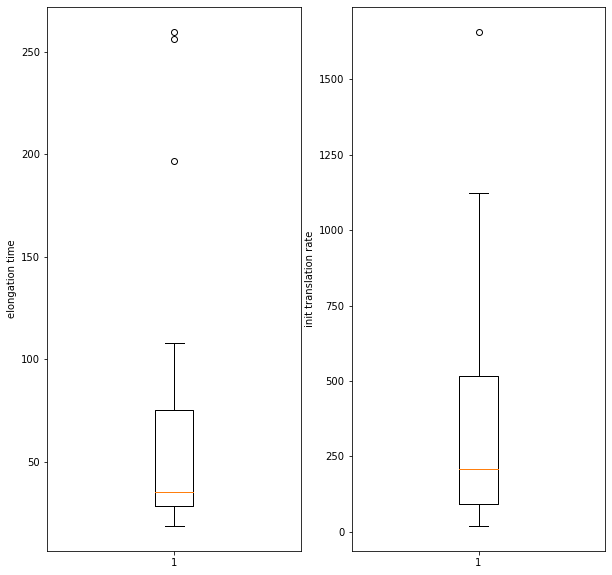

In [46]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(result['elongation_time'])
ax[1].boxplot(result['init_translation_rate'])
ax[0].set_ylabel('elongation time')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(result.mean())

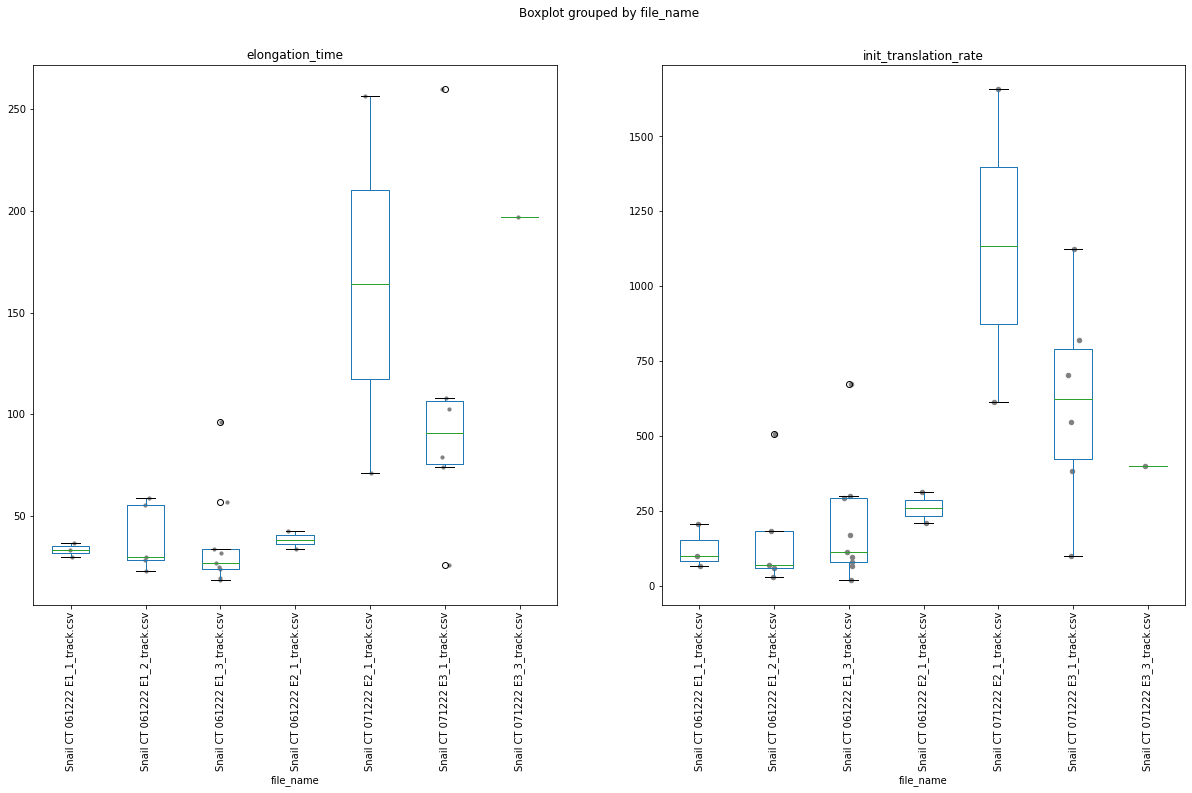

In [48]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = plt.subplots(1,2)
result.boxplot(['elongation_time'] , 
               by='file_name', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

result.boxplot([ 'init_translation_rate'] , 
               by='file_name', 
               grid=False, 
               ax = ax[1],
               rot=90
               )

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
    
group = 'file_name'
column = 'init_translation_rate'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((20,10))

In [62]:
result.groupby(by='file_name')[['len_track','elongation_time', 'init_translation_rate']].mean()

len_track  elongation_time  \
file_name                                                     
Snail CT 061222 E1_1_track.csv  176.540000        33.319908   
Snail CT 061222 E1_2_track.csv  173.940000        38.994066   
Snail CT 061222 E1_3_track.csv  183.516667        36.934602   
Snail CT 061222 E2_1_track.csv  196.755000        38.287813   
Snail CT 071222 E2_1_track.csv   57.330000       163.791299   
Snail CT 071222 E3_1_track.csv  131.625000       108.293632   
Snail CT 071222 E3_3_track.csv   92.820000       196.991156   

                                init_translation_rate  
file_name                                              
Snail CT 061222 E1_1_track.csv             123.702980  
Snail CT 061222 E1_2_track.csv             169.508422  
Snail CT 061222 E1_3_track.csv             199.970301  
Snail CT 061222 E2_1_track.csv             259.472344  
Snail CT 071222 E2_1_track.csv            1135.686527  
Snail CT 071222 E3_1_track.csv             612.276570  
Snail CT 071222 E3_3_track.csv             399.250485

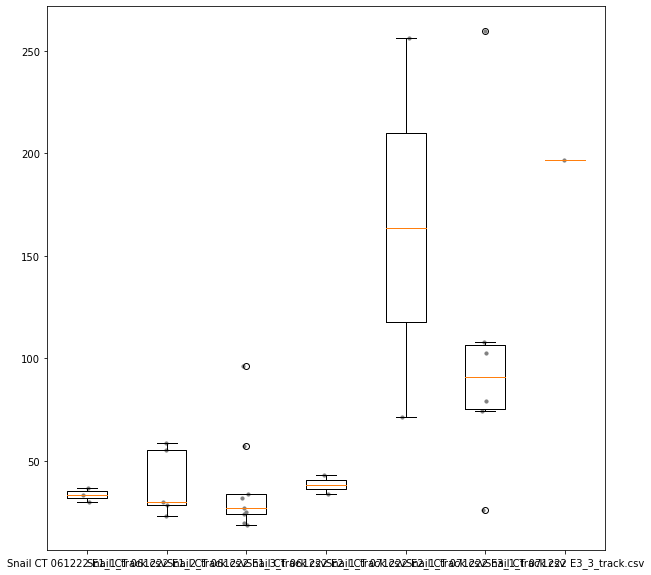

In [56]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# initialize dataframe
# n = 200
# ngroup = 3
# df = pd.DataFrame({'data': np.random.rand(n), 'group': map(np.floor, np.random.rand(n) * ngroup)})
fig, ax = plt.subplots()

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

ax.boxplot(vals, labels=names, )
ngroup = len(vals)



for x, val, clevel in zip(xs, vals, clevels):
    ax.scatter(x, val, c='grey', alpha=1, s=10)
    
ax.grid(False)
fig.set_size_inches((10,10))

In [58]:
result[["file_name", 'len_track','elongation_time', 'init_translation_rate']]

file_name len_track elongation_time  \
0   Snail CT 061222 E1_1_track.csv    197.34        33.42699   
1   Snail CT 061222 E1_1_track.csv    166.14       29.701161   
2   Snail CT 061222 E1_1_track.csv    166.14       36.831572   
3   Snail CT 061222 E1_2_track.csv    191.88       58.710773   
4   Snail CT 061222 E1_2_track.csv    197.73       22.893019   
5   Snail CT 061222 E1_2_track.csv    154.44       28.489457   
6   Snail CT 061222 E1_2_track.csv     156.0       29.626129   
7   Snail CT 061222 E1_2_track.csv    169.65       55.250952   
8   Snail CT 061222 E1_3_track.csv    190.71       56.901926   
9   Snail CT 061222 E1_3_track.csv    198.51       19.493409   
10  Snail CT 061222 E1_3_track.csv    176.28       96.282938   
11  Snail CT 061222 E1_3_track.csv    176.67       23.917312   
12  Snail CT 061222 E1_3_track.csv    175.11       24.967005   
13  Snail CT 061222 E1_3_track.csv    192.66       18.462001   
14  Snail CT 061222 E1_3_track.csv    184.86       33.575222   
15  Snail CT 061222 E1_3_track.csv    181.35        31.83285   
16  Snail CT 061222 E1_3_track.csv     175.5       26.978755   
17  Snail CT 061222 E2_1_track.csv    196.56       42.791461   
18  Snail CT 061222 E2_1_track.csv    196.95       33.784166   
19  Snail CT 071222 E2_1_track.csv     59.67      256.410194   
20  Snail CT 071222 E2_1_track.csv     54.99       71.172404   
21  Snail CT 071222 E3_1_track.csv    122.07       26.041977   
22  Snail CT 071222 E3_1_track.csv    196.56      108.052925   
23  Snail CT 071222 E3_1_track.csv    106.86      259.812673   
24  Snail CT 071222 E3_1_track.csv     140.4       79.216959   
25  Snail CT 071222 E3_1_track.csv     120.9      102.563273   
26  Snail CT 071222 E3_1_track.csv    102.96       74.073981   
27  Snail CT 071222 E3_3_track.csv     92.82      196.991156   

   init_translation_rate  
0              98.256678  
1              65.710959  
2             207.141304  
3             506.608097  
4              60.078082  
5             181.953198  
6              29.620264  
7              69.282469  
8             299.749511  
9               93.64649  
10            672.675218  
11             64.414078  
12             78.970952  
13             18.168104  
14            168.572399  
15            292.063433  
16            111.472529  
17            207.844488  
18            311.100199  
19           1657.771231  
20            613.601823  
21             99.823017  
22            546.623077  
23           1124.920414  
24             818.69055  
25            701.695545  
26            381.906817  
27            399.250485

In [215]:
result[["file_name", 'len_track','elongation_time_norm', 'init_translation_rate']].mean()

/tmp/ipykernel_111383/2480877291.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result[["file_name", 'len_track','elongation_time_norm', 'init_translation_rate']].mean()


len_track                176.642143
elongation_time_norm      41.779666
init_translation_rate      0.753582
dtype: float64

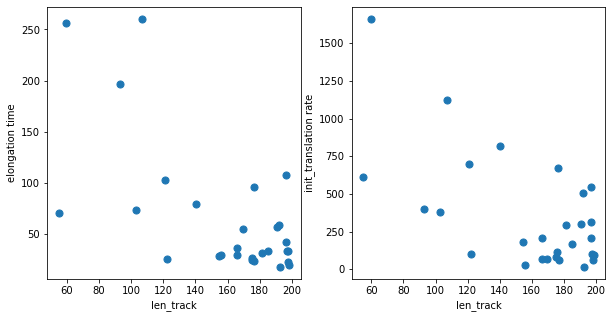

In [63]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))